<a href="https://colab.research.google.com/github/vibhajoshi/LGMVIP_Data-Science/blob/main/StockMarketPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Author
# Vibha.V.Joshi - Data Science Intern
# Task 1.2 - Stock market prediction with python
# LetsGrowMore - September 2022

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
dataset_link = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
data = pd.read_csv(dataset_link)
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [5]:
data['Date'] = pd.to_datetime(data['Date'])
df = data.sort_values('Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


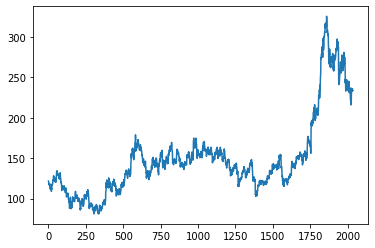

In [6]:
df.reset_index(inplace=True)
plt.plot(df['Close'])

In [7]:
df_close = df['Close']
df_close

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))
df_close

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [9]:
training_size = int(len(df_close)*0.70)
test_size = len(df_close) - training_size
train, test = df_close[0: training_size,:], df_close[training_size : len(df_close),:1]

In [10]:
def create_mat(ds, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(ds)-time_step-1):
        a = ds[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(ds[i + time_step, 0])
    return np.array(dataX), np.array(dataY)
    

In [11]:
time_step = 100
X_train, y_train = create_mat(train, time_step)
X_test, y_test = create_mat(test, time_step)

In [12]:
X_train.shape

(1323, 100)

In [13]:
y_train.shape

(1323,)

In [14]:
X_test.shape

(510, 100)

In [15]:
y_test.shape

(510,)

In [16]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train, y_train, validation_split=0.1, epochs= 60, batch_size=64, verbose = 1)

Epoch 1/60
19/19 [==============================] - 12s 314ms/step - loss: 0.0122 - val_loss: 0.0012
Epoch 2/60
19/19 [==============================] - 4s 204ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 3/60
19/19 [==============================] - 4s 202ms/step - loss: 9.6218e-04 - val_loss: 0.0014
Epoch 4/60
19/19 [==============================] - 4s 203ms/step - loss: 8.8025e-04 - val_loss: 0.0012
Epoch 5/60
19/19 [==============================] - 4s 209ms/step - loss: 8.7425e-04 - val_loss: 0.0012
Epoch 6/60
19/19 [==============================] - 4s 203ms/step - loss: 8.2961e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 4s 203ms/step - loss: 7.9285e-04 - val_loss: 0.0010
Epoch 8/60
19/19 [==============================] - 4s 202ms/step - loss: 7.7745e-04 - val_loss: 0.0010
Epoch 9/60
19/19 [==============================] - 4s 205ms/step - loss: 7.3384e-04 - val_loss: 9.8500e-04
Epoch 10/60
19/19 [==============================] - 4s 204ms/step 

In [19]:
predictions = model.predict(X_test)

In [20]:
inv_predictions = scaler.inverse_transform(predictions)

In [21]:
inv_predictions

array([[142.39088 ],
       [142.62857 ],
       [141.8168  ],
       [139.26247 ],
       [137.54115 ],
       [136.83046 ],
       [137.80405 ],
       [139.29677 ],
       [139.81802 ],
       [139.64755 ],
       [139.52356 ],
       [140.66393 ],
       [141.44022 ],
       [142.95255 ],
       [145.0755  ],
       [143.31653 ],
       [141.0063  ],
       [140.44029 ],
       [140.80582 ],
       [145.37602 ],
       [149.68054 ],
       [152.13264 ],
       [152.87445 ],
       [151.16641 ],
       [150.85371 ],
       [150.39687 ],
       [150.54532 ],
       [151.98055 ],
       [152.696   ],
       [152.8181  ],
       [153.2762  ],
       [152.27792 ],
       [149.25531 ],
       [143.75117 ],
       [140.18045 ],
       [138.86925 ],
       [138.79834 ],
       [138.04027 ],
       [135.97992 ],
       [132.57913 ],
       [130.1464  ],
       [128.88614 ],
       [126.788574],
       [125.888275],
       [123.88735 ],
       [121.3169  ],
       [120.4895  ],
       [120.0

In [26]:
import math
from sklearn.metrics import mean_squared_error
m = math.sqrt(mean_squared_error(y_test, predictions))
print("The Mean Squared Error is: ", m)

The Mean Squared Error is:  0.05431590845946619




---



---


Building the dashboard using Ploty dash

In [67]:
import pandas as pd
import plotly.express as px
df = pd.read_csv('/content/avocado-updated-2020.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33045 entries, 0 to 33044
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           33045 non-null  object 
 1   average_price  33045 non-null  float64
 2   total_volume   33045 non-null  float64
 3   4046           33045 non-null  float64
 4   4225           33045 non-null  float64
 5   4770           33045 non-null  float64
 6   total_bags     33045 non-null  float64
 7   small_bags     33045 non-null  float64
 8   large_bags     33045 non-null  float64
 9   xlarge_bags    33045 non-null  float64
 10  type           33045 non-null  object 
 11  year           33045 non-null  int64  
 12  geography      33045 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.3+ MB


In [69]:
from dash import Dash, html, dcc, Input, Output
import pandas as pd
import plotly.express as px

avocado = pd.read_csv('/content/avocado-updated-2020.csv')
app = Dash()


In [70]:
geo_dropdown = dcc.Dropdown(options=avocado['geography'].unique(),
                            value='New York')

app.layout = html.Div(children=[
    html.H1(children='Avocado Prices Dashboard'),
    geo_dropdown,
    dcc.Graph(id='price-graph')
])

In [73]:
@app.callback(
    Output(component_id='price-graph', component_property='figure'),
    Input(component_id=geo_dropdown, component_property='value')
)
def update_graph(selected_geography):
    filtered_avocado = avocado[avocado['geography'] == selected_geography]
    line_fig = px.line(filtered_avocado,
                       x='date', y='average_price',
                       color='type',
                       title=f'Avocado Prices in {selected_geography}')
    return line_fig

In [68]:
msk = df['geography'] == 'Los Angeles'

px.line(df[msk], x='date', y='average_price', color='type')



---



---

